# Getting Started with Pandas

[Pandas](https://pandas.pydata.org/) is the most popular and widely used Python library for data wrangling and analysis. Originally eveloped in the financial services industry, pandas is now included in all major distributions of Python and has become a mainstay for doing data analysis in Python. 

The purpose of this notebook is to get you started using pandas. Pandas is a big library capable of handling complex applications. But in the spirit of the 80/20 rule (i.e., [Pareto principle]()), our goal here is to introduce a small part of the pandas library that can handle requirements.

This streamlined approach employees principles of "Tidy Data", a consistent, simple, and straightforward approach to organizing tabular data. Keeping data organized following "Tidy Data" principles means much less time "wrangling" data, short and clear Python code for analysis, and more time devoted to creating good data.

## Tidy Data

Data acquired in process applications is normally accumulated by repeated observation of process variables. The values are typically numbers, such as temperature or pressure, but can also be strings, integers, or categorical data, such as whether a solenoid valve is an "on" or "off", or the status of a process alarm.

We will make the following assumptions about our data sets.

* Data from repeated observations is arranged in tabular form in data files. Each distinct experiment, treatment, or unit of data is located in a separate file.
* Every column of a data file holds all data for a unique variable.
* Every row of a data file is an observation.
* Every cell contains a single value.

These straightforward guidelines are closely tied to concepts underlying relational databases and have become known as the ["Tidy Data"](https://vita.had.co.nz/papers/tidy-data.pdf) principles popularized by Hadley Wickham. Adopting these principles when creating and saving data streamlines later analysis. [Hart, et al., provide excellent contrasting examples of tidy and messy data](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005097).

For these notes we will assume our data is stored in data files organized using "Tiny Data" principles. If your data doesn't satisfy these assumptions, follow the procedures described by [Wickham](https://vita.had.co.nz/papers/tidy-data.pdf) to reorgnize your data for efficient analysis.

## Reading Data Files

We proceed assuming data stored in data files, each data file corresponding to an experiment or other clearly defined collection of observations. 

### From .csv files

For files stored in `.csv` format, a pandas **DataFrame** object is created with the [`read_csv(data_file)`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). `data_file` is a string containing a url or the name of a local file. `read_csv()` function has many optional arguments, but for simple cases the path to the data file is often enough to do the job.

In [1]:
import pandas as pd

data_file = "https://raw.githubusercontent.com/jckantor/cbe30338-book/main/notebooks/data/tclab-data-example.csv"
df = pd.read_csv(data_file)
display(df)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0
...,...,...,...,...,...
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0


### From Google Sheets

Google sheets are a convenient to collect and share data. There is a complete API and libraries to enable full read/write access to Google Sheets. But if the data is not confidential and can be temporarilty published to the web for public access, then it takes just a few steps and one line of Python to read the data as pandas DataFrame.

The first step is publish the sheet to the web. In Google Sheets, select "File > Share > Publish to the Web".

![](figures/pandas-google-sheets-1.png)

In the dialog box, choose the "Link" tab. The choose the sheet to be published and "Comma-seperated values (.csv)" from the drop down menus. Click "Publish".

![](figures/pandas-google-sheets-2.png)

After confirming the choice to publish, copy the link url.  This url can be read by `.read_csv()` to create a pandas dataframe.

![](figures/pandas-google-sheets-3.png)

Copy the url into the following cell to complete the operation.

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSNUCEFMaGZ-y18p-AnDoImEeenMLbRxXBABwFNeP8I3xiUejolPJx-kr4aUywD0szRel81Kftr8J0R/pub?gid=896527992&single=true&output=csv"
hx = pd.read_csv(sheet_url)
hx

,Hot Flow (L/hr),Cold Flow (L/hr),Time,H Outlet,H Inlet,C Inlet,C Outlet,T5 (ｰC),T6 (ｰC),T7 (ｰC),...,dQm/dt (kW),cp2 (kJ/kg*K),cp1 (kJ/kg*K),dTm (ｰC),k1 (kW/K*mｲ),k2 (kW/K*mｲ),km (kW/K*mｲ),rho1 (kg/dmｳ),rho2 (kg/dmｳ),EFF (%)
0,651,798,32:08.1,37.3,56.4,15.5,30.8,41.8,18.8,45.5,...,14.29,4.183,4.179,23.6,10.703,13.305,8.673,0.989,0.998,100.0
1,651,798,32:07.8,37.2,56.3,15.4,30.8,41.8,18.8,45.5,...,14.29,4.183,4.179,23.6,10.678,13.329,8.671,0.989,0.998,100.0
2,651,798,32:07.6,37.2,56.3,15.4,30.8,41.8,18.8,45.5,...,14.25,4.183,4.179,23.6,10.654,13.329,8.639,0.989,0.998,100.0
3,650,512,29:13.0,41.4,56.4,15.6,34.7,45.5,20.3,48.4,...,11.39,4.182,4.179,23.7,10.862,8.483,6.884,0.989,0.997,99.0
4,650,512,29:12.3,41.4,56.4,15.6,34.7,45.5,20.3,48.4,...,11.35,4.182,4.179,23.7,10.814,8.482,6.866,0.989,0.997,98.0
5,650,512,29:12.1,41.4,56.4,15.6,34.7,45.5,20.3,48.4,...,11.30,4.182,4.179,23.7,10.814,8.410,6.837,0.987,0.996,140.0
6,655,201,26:17.3,47.9,56.4,16.1,42.3,50.4,24.2,52.0,...,7.75,4.180,4.180,21.7,10.824,4.951,5.105,0.987,0.996,137.0
7,655,201,26:17.1,47.9,56.4,16.2,42.3,50.6,24.2,52.0,...,7.60,4.180,4.180,21.7,10.751,4.805,5.004,0.987,0.996,132.0
8,655,201,26:16.8,47.9,56.4,16.2,42.3,50.6,24.2,52.1,...,7.49,4.180,4.180,21.7,10.751,4.660,4.933,0.990,0.998,99.0
9,503,795,20:22.3,34.5,56.4,15.5,29.1,39.2,18.1,43.3,...,12.62,4.183,4.179,22.9,8.296,13.285,7.882,0.990,0.998,98.0


### From Python

Pandas dataframes can be created directly in Python. Here we demonstrate use of a Python dictionary to create a dataframe with data for variables computed as numpy arrays.

In [3]:
import numpy as np

t = np.linspace(0, 10, 201)
s = np.sin(t)
c = np.cos(t)

df_np = pd.DataFrame({"time": t, "sin": s, "cos": c})
df_np

,time,sin,cos
0,0.00,0.000000,1.000000
1,0.05,0.049979,0.998750
2,0.10,0.099833,0.995004
3,0.15,0.149438,0.988771
4,0.20,0.198669,0.980067
...,...,...,...
196,9.80,-0.366479,-0.930426
197,9.85,-0.412523,-0.910947
198,9.90,-0.457536,-0.889191
199,9.95,-0.501405,-0.865213


## Accessing Data from DataFrames

The core object in pandas is the **DataFrame**. For "Tidy Data", a DataFrame will be collection of columns, each column containing observations of a single, unique variable. Each row is one observation of all variables. 

The **index** assigns a unique label to each row/observation.

In [4]:
df.index

RangeIndex(start=0, stop=801, step=1)

The names of the **columns** are given by `.columns`.

In [5]:
df.columns

Index(['Time', 'T1', 'T2', 'Q1', 'Q2'], dtype='object')

Each column forms a ``Series`` comprised of all observations of a variable. There are several common ways to access the data series for a variable. These produce the same result. 

* `df["T1"]` 
* `df.T1`
* `df.loc[:, "T1"]`

Which you choose depends on situation and context.

In [6]:
df["T1"]

0      21.543
1      21.543
2      21.543
3      21.543
4      21.543
        ...  
796    58.281
797    58.120
798    58.378
799    58.281
800    58.668
Name: T1, Length: 801, dtype: float64

The `.loc[row, column]` is used to extract slices of the dataframe. A single value is accessed by row index and column label.

In [7]:
df.loc[3, "T1"]

21.543

To extract values for multiple variables from a single observation.

In [8]:
df.loc[3, ["T1", "T2"]]

T1    21.543
T2    20.931
Name: 3, dtype: float64

To extract a range of observations of one or more variables.

In [9]:
df.loc[3:5, ["T1", "T2"]]

,T1,T2
3,21.543,20.931
4,21.543,20.931
5,21.543,20.931


Observations can be selected by conditions.

In [10]:
df[(df.Time >= 100) & (df.Time <= 110)]

,Time,T1,T2,Q1,Q2
100,100.01,36.367,22.929,50.0,0.0
101,101.00,36.399,23.090,50.0,0.0
102,102.01,36.689,23.154,50.0,0.0
103,103.01,36.689,23.154,50.0,0.0
104,104.01,37.012,23.187,50.0,0.0
105,105.01,37.012,23.154,50.0,0.0
106,106.00,37.173,23.154,50.0,0.0
107,107.00,37.334,23.187,50.0,0.0
108,108.00,37.398,23.380,50.0,0.0
109,109.01,37.656,23.412,50.0,0.0


## Visualizing Data

Pandas provides convenient tools for displaying data in tabular and graphical formats.

### Tabular Display

The quickest way to display a dataframe as a table is with `display()`. Additional styling and formating options are available through a dataframe's `.style` property.

In [11]:
display(df)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0
...,...,...,...,...,...
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0


For development it is often enough to view just the first few rows or last few rows of a dataframe. The dataframe methods `.head()` and `.tail()` provide this service.

In [12]:
df.head(5)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0


In [13]:
df.tail(5)

,Time,T1,T2,Q1,Q2
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0
800,800.01,58.668,37.592,50.0,0.0


### Plotting

An extensive variety of plots can be constructed using a dataframe's `.plot()` method. Many of the usual Matploblib plotting commands can be accessed through options passed to `.plot()`. For many routine applications, a single call of a dataframe's `.plot()` method can replace many lines of Python code using Matplotlib.

For example, to plot all observations for a single variable.

<AxesSubplot:>

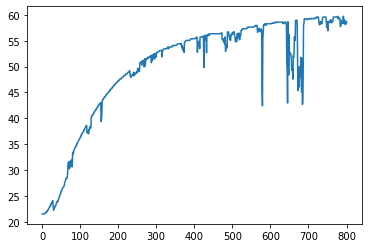

In [14]:
df.T1.plot()

The `.plot()` method will often be used to plot one or more variables on the vertical 'y' axis as a function of another variable on the horizontal 'x' axes. Additional options specify line styles, grid, labels, titles, and much more. 

<AxesSubplot:title={'center':'TC Lab'}, xlabel='Time', ylabel='deg C'>

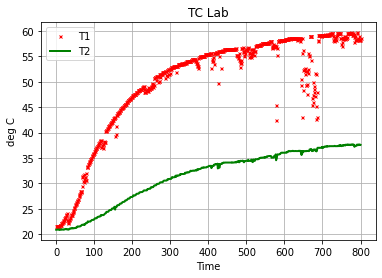

In [15]:
df.plot("Time", ["T1", "T2"], style={"T1":'rx', "T2":'g'}, lw=2, ms=3, 
        ylabel="deg C", title="TC Lab", grid=True)

array([[<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>]],
      dtype=object)

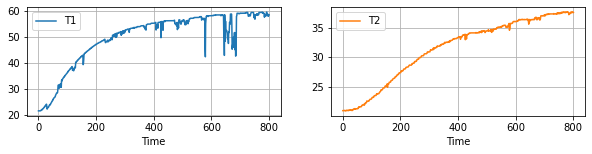

In [16]:
df.plot(x = "Time", y=["T1", "T2"], subplots=True, figsize=(10, 2), grid=True, layout=(1, 2))

<AxesSubplot:xlabel='Time'>

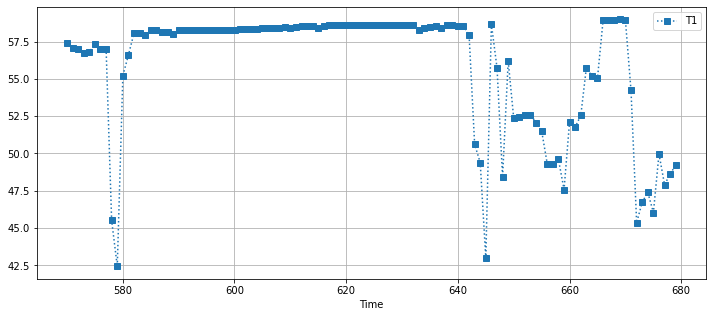

In [17]:
df[(df.Time > 570) & (df.Time < 680)].plot(x="Time", y="T1", figsize=(12, 5), style={"T1":"s:"}, grid=True)

### Scatter Plots

<AxesSubplot:xlabel='T1', ylabel='T2'>

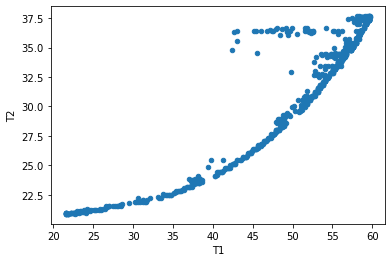

In [18]:
df.plot.scatter(x = "T1", y = "T2")

### Statistical Plots

array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>]], dtype=object)

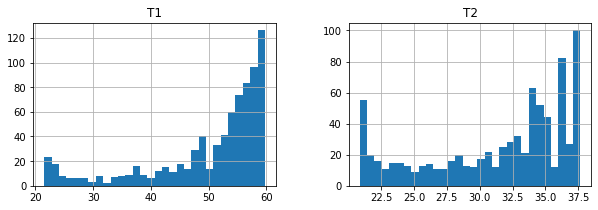

In [19]:
df[["T1", "T2"]].hist(bins=30, figsize=(10, 3))

## Working with Variables

Pandas provide are an effective data structure for calculations with data.

To illustrate, here we have temperature and flow data for a double pipe heat exchanger 

In [20]:
print(hx.columns)

Index(['Hot Flow (L/hr)', 'Cold Flow (L/hr)', 'Time', 'H Outlet', 'H Inlet',
       'C Inlet', 'C Outlet', 'T5 (ｰC)', 'T6 (ｰC)', 'T7 (ｰC)', 'T8 (ｰC)',
       'T9 (ｰC)', 'T10 (ｰC)', 'dp1 (mbar)', 'dp2 (mbar)', 'dQ1/dt (kW)',
       'dQ2/dt (kW)', 'dQm/dt (kW)', 'cp2 (kJ/kg*K)', 'cp1 (kJ/kg*K)',
       'dTm (ｰC)', 'k1 (kW/K*mｲ)', 'k2 (kW/K*mｲ)', 'km (kW/K*mｲ)',
       'rho1 (kg/dmｳ)', 'rho2 (kg/dmｳ)', 'EFF (%)'],
      dtype='object')


<AxesSubplot:title={'center':'Heat Balances'}>

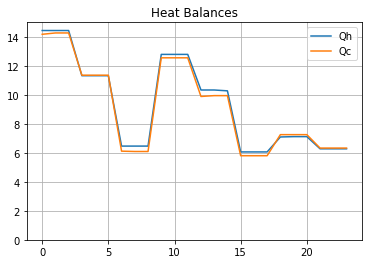

In [22]:
# heat capacity of water 
Cp = 4.18 # kJ/ L / C

hx["Qh"] = Cp * hx["Hot Flow (L/hr)"] * (hx["H Inlet"] - hx["H Outlet"]) / 3600
hx["Qc"] = Cp * hx["Cold Flow (L/hr)"] * (hx["C Outlet"] - hx["C Inlet"]) / 3600

hx.plot(y = ["Qh", "Qc"], ylim = (0, 15), grid=True, title="Heat Balances")

In [25]:
import numpy as np

dT1 = hx["H Inlet"] - hx["C Outlet"]
dT0 = hx["H Outlet"] - hx["C Inlet"]

hx["LMTD"] = (dT1 - dT0) / np.log(dT1/dT0)
hx["LMTD"]

0     23.649139
1     23.601683
2     23.601683
3     23.690900
4     23.690900
5     23.690900
6     21.763415
7     21.724590
8     21.724590
9     22.899854
10    22.899854
11    22.899854
12    23.148236
13    23.098701
14    23.149100
15    21.415674
16    21.415674
17    21.415674
18    18.690256
19    18.725265
20    18.725265
21    19.680153
22    19.680153
23    19.680153
Name: LMTD, dtype: float64

In [45]:
hx["UA"] =  0.5*(hx.Qh + hx.Qc)/hx.LMTD
hx["R"] = 1.0/hx["UA"]
hx["Ac"] = hx["Hot Flow (L/hr)"]**(-0.8)
hx["Ah"] = hx["Cold Flow (L/hr)"]**(-0.8)

In [46]:
import statsmodels.formula.api as sm

result = sm.ols(formula="R ~ Ac + Ah", data = hx).fit()
print(result.params)
print(result.summary())

Intercept      0.141716
Ac           115.292199
Ah           186.346764
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3711.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.70e-27
Time:                        23:10:39   Log-Likelihood:                 44.929
No. Observations:                  24   AIC:                            -83.86
Df Residuals:                      21   BIC:                            -80.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

<AxesSubplot:>

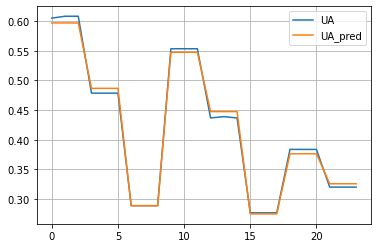

In [47]:
hx["UA_pred"] = 1/(0.14 + 115.3*hx["Ac"] + 186.3*hx["Ah"])
hx.plot(y = ["UA", "UA_pred"], grid=True)